In [2]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point, Polygon, box
#import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

# Paul Allen Data is Collected from the EXTECH HT30 Heat Stress Meter

In [3]:
#ins= pd.read_csv("allen.txt", sep='       ', header=0)
ins= pd.read_csv("allenM.txt", sep='       ', header=0)
#ins= pd.read_csv("nov9allen.txt", sep='       ', header=0)

ins.head()
ins['Index  ---date--- --time--']= ins['Index  ---date--- --time--'].str[-19:]
ins['Index  ---date--- --time--'] = pd.to_datetime(ins['Index  ---date--- --time--'], utc=True)
ins


/Users/amandaworthy/opt/anaconda3/envs/uwgda2022/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Index ---date--- --time--,WBGT,unit,Ta,unit.1,Tg,unit.2,RH,unit.3
0,2022-11-01 11:21:28+00:00,60.9,F,73.1,F,74.1,F,30.5,%
1,2022-11-01 11:21:56+00:00,61.0,F,73.3,F,74.3,F,30.4,%
2,2022-11-01 11:22:26+00:00,61.1,F,73.4,F,74.3,F,30.4,%
3,2022-11-01 11:22:56+00:00,61.1,F,73.5,F,74.4,F,30.2,%
4,2022-11-01 11:23:26+00:00,61.1,F,73.5,F,74.5,F,30.0,%
...,...,...,...,...,...,...,...,...,...
14298,2022-11-09 14:45:14+00:00,58.7,F,74.8,F,74.3,F,17.1,%
14299,2022-11-09 14:46:14+00:00,58.7,F,74.7,F,74.4,F,17.2,%
14300,2022-11-09 14:47:14+00:00,58.7,F,74.8,F,74.5,F,17.2,%
14301,2022-11-09 14:48:14+00:00,58.7,F,74.7,F,74.5,F,17.2,%


In [4]:
for col in ins.columns:
    print(col)

Index  ---date--- --time--
   WBGT
  unit
    Ta
  unit.1
    Tg
  unit.2
    RH
  unit.3


In [5]:
ins.rename(columns = {'Index  ---date--- --time--':'Date_Time', '   WBGT':'WBGT', '  unit': 'unit', '    Ta':'TA','  unit.1': 'unit.1', '    Tg':'TG','  unit.2': 'unit.2', '    RH':'RH','  unit.3': 'unit.3' }, inplace = True)
                         
                         
for col in ins.columns:
    print(col)                 
                         

Date_Time
WBGT
unit
TA
unit.1
TG
unit.2
RH
unit.3


In [6]:
ins['time_hour'] = ins['Date_Time'].dt.hour
ins

,Date_Time,WBGT,unit,TA,unit.1,TG,unit.2,RH,unit.3,time_hour
0,2022-11-01 11:21:28+00:00,60.9,F,73.1,F,74.1,F,30.5,%,11
1,2022-11-01 11:21:56+00:00,61.0,F,73.3,F,74.3,F,30.4,%,11
2,2022-11-01 11:22:26+00:00,61.1,F,73.4,F,74.3,F,30.4,%,11
3,2022-11-01 11:22:56+00:00,61.1,F,73.5,F,74.4,F,30.2,%,11
4,2022-11-01 11:23:26+00:00,61.1,F,73.5,F,74.5,F,30.0,%,11
...,...,...,...,...,...,...,...,...,...,...
14298,2022-11-09 14:45:14+00:00,58.7,F,74.8,F,74.3,F,17.1,%,14
14299,2022-11-09 14:46:14+00:00,58.7,F,74.7,F,74.4,F,17.2,%,14
14300,2022-11-09 14:47:14+00:00,58.7,F,74.8,F,74.5,F,17.2,%,14
14301,2022-11-09 14:48:14+00:00,58.7,F,74.7,F,74.5,F,17.2,%,14


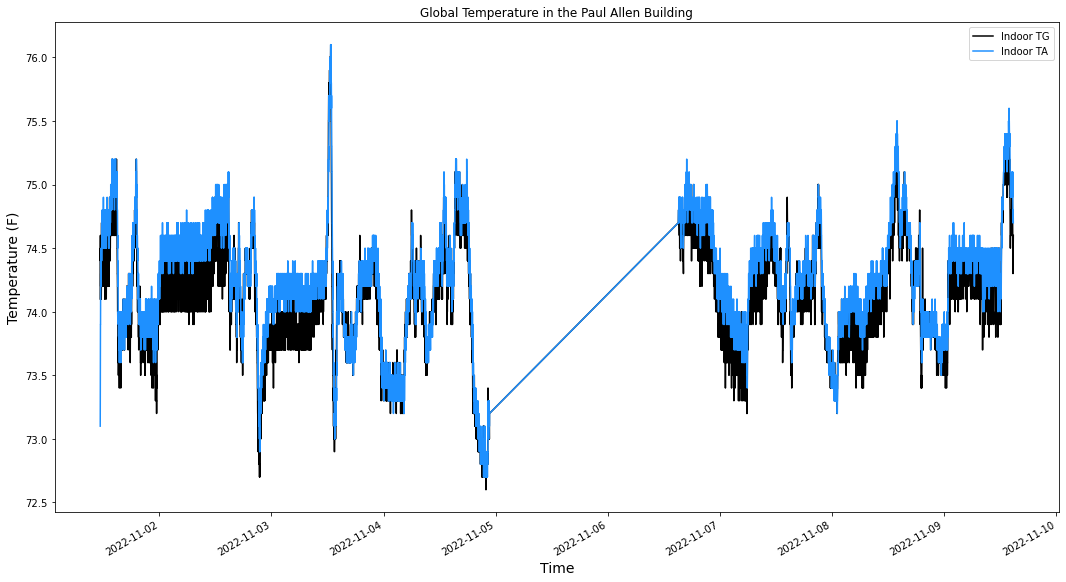

In [7]:
fig,ax = plt.subplots(figsize=(18,10))


ins.plot(x='Date_Time', y='TG' ,color='k', markerfacecolor='white', ax=ax, label = "Indoor TG",)
ins.plot(x='Date_Time', y='TA',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Indoor TA")



ax.set_title('Global Temperature in the Paul Allen Building')
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("Temperature (F)",color='k',fontsize=14);


In [8]:
print('Ambient Temperature:')
print(ins["TA"].max())
print(ins["TA"].min())

Ambient Temperature:
76.1
72.7


In [9]:
print('Global Temperature:')
print(ins["TG"].max())
print(ins["TG"].min())

Global Temperature:
76.1
72.6


# Import Outdoor Temperature Measurments collected from the UW ATMS Building 

https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=UWASH&hour1=20&min1=48&timetype=LOCAL&unit=0&graph=0

In [10]:
UWASH= pd.read_csv("UWASH.2022-11-11.csv", sep=',', header=[10])
UWASH= UWASH.drop(0,axis=0)

In [11]:
UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time, utc=True)
cols = UWASH.columns.drop(['Date_Time'])
UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')


UWASH.head() 
UWASH.tail() 

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1
236,NaN,2022-11-11 07:55:00+00:00,35.0,NaN,0.0
237,NaN,2022-11-11 08:55:00+00:00,34.0,NaN,1.0
238,NaN,2022-11-11 09:55:00+00:00,35.0,NaN,0.0
239,NaN,2022-11-11 10:55:00+00:00,36.0,NaN,1.0
240,NaN,2022-11-11 11:55:00+00:00,36.0,NaN,2.0


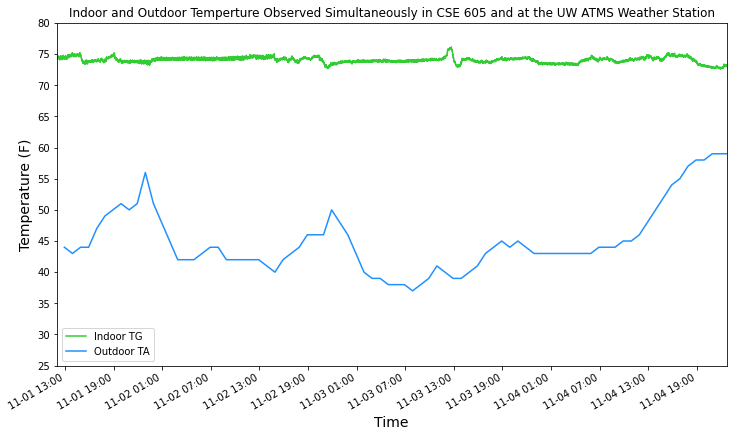

In [19]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates 

fig,ax = plt.subplots(figsize=(12,7))


#plot inside
ins.plot(x='Date_Time', y='TG', color='limegreen', markerfacecolor='white', ax=ax, label = "Indoor TG",)
#ins.plot(x='date', y='TA',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Indoor TA")

#plot outside
UWASH.plot(x='Date_Time', y='air_temp_set_1',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Outdoor TA")


ax.set_title('Indoor and Outdoor Temperture Observed Simultaneously in CSE 605 and at the UW ATMS Weather Station')
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("Temperature (F)",color='k',fontsize=14);


ax.set_xlim(pd.Timestamp('2022-11-01 12:00:00'), pd.Timestamp('2022-11-04 22:40:54'));

#11-06-2022 15:07:16 11-09-2022 14:49:14


hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%m-%d %H:00')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
plt.yticks(np.arange(25, 85, 5));

In [13]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

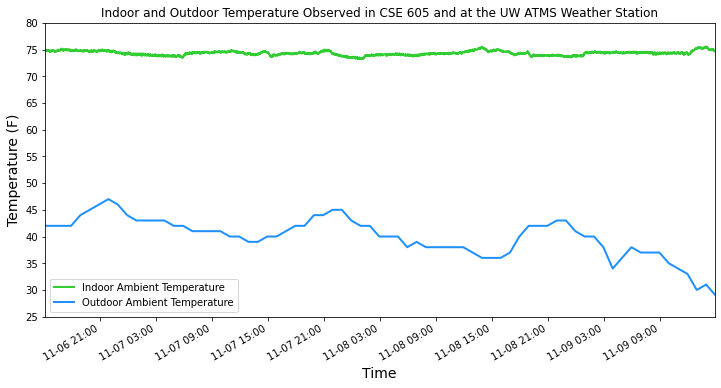

In [14]:
fig,ax = plt.subplots(figsize=(12,6))


#plot inside
#ins.plot(x='Date_Time', y='TG', color='limegreen', markerfacecolor='white', ax=ax, label = "Indoor TG",)
ins.plot(x='Date_Time', y='TA',color='limegreen', markerfacecolor='white', ax=ax, label = "Indoor Ambient Temperature", linewidth = 2)

#plot outside
UWASH.plot(x='Date_Time', y='air_temp_set_1',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Outdoor Ambient Temperature", linewidth = 2)


ax.set_title('Indoor and Outdoor Temperature Observed in CSE 605 and at the UW ATMS Weather Station')
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("Temperature (F)",color='k',fontsize=14);

ax.set_xlim(pd.Timestamp('11-06-2022 15:07:16'), pd.Timestamp('11-09-2022 14:49:14'));

#date_form = DateFormatter("%m-%d %H ")
#ax.xaxis.set_major_formatter(date_form)
#11-06-2022 15:07:16 11-09-2022 14:49:14
plt.yticks(np.arange(25, 85, 5));


hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%m-%d %H:00')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

plt.savefig('ts_In&Out.pdf') 


In [15]:
result =pd.concat([UWASH, ins], keys=["Date_Time", "Date_Time", ])

#drop all mostly na columns 
result=result.dropna(thresh=len(result) -14400, axis=1)
result= result.reset_index()
result['Date_Time']= pd.to_datetime(result['Date_Time'], utc=True)

#result['time_hour'] = result['Date_Time'].hour
#result.to_csv('result.csv')
result.Date_Time.min()

Timestamp('2022-11-01 11:21:28+0000', tz='UTC')

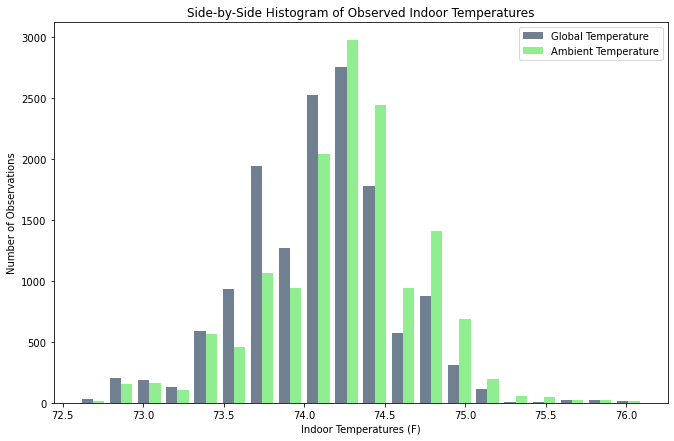

In [16]:
x1 = ins['TG']
x2 = ins['TA']

fig, axs1 = plt.subplots(figsize=(11,7))

colors = ['slategrey', 'lightgreen']
names = ['Global Temperature', 'Ambient Temperature']

# Make the histogram using a list of lists
axs1.hist([x1,x2], bins = 20, color = colors, label=names)

# Plot formatting
axs1.legend()
axs1.set_xlabel('Indoor Temperatures (F)')
axs1.set_ylabel('Number of Observations')
axs1.set_title('Side-by-Side Histogram of Observed Indoor Temperatures');
plt.savefig('histogram_TG&TA.pdf') 

In [17]:
print(ins['TG'].mean())
print(ins['TA'].mean())
print ('Observed TA values are slighly higher')

74.0849052646298
74.23421659791651
Observed TA values are slighly higher


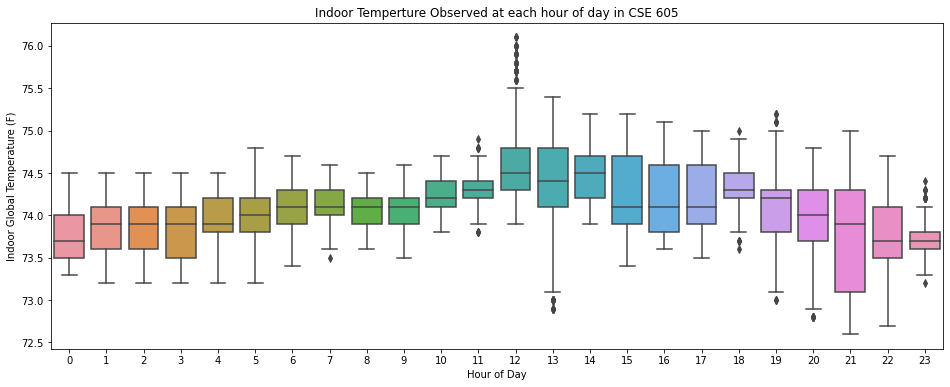

In [18]:
import matplotlib.pyplot as plt
import seaborn

a= 9,10

#my_pal = {time_hour: "r" if time_hour == (9 & 10).any() else "b" for time_hour in ins.time_hour.unique()}


fig, ax = plt.subplots(figsize=(16,6))
seaborn.boxplot(x = ins.time_hour, 
                y = ins.TG,
#                palette=my_pal,
                ax = ax)



ax.set(ylabel='Indoor Global Temperature (F)',
       xlabel='Hour of Day',
       title='Indoor Temperture Observed at each hour of day in CSE 605');

plt.savefig('box_plot_hour.pdf')  